<a href="https://colab.research.google.com/github/SAMashiyane/organophosphate_pro/blob/main/pycaret_organph_total_dose_atropin_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for total_atropin_adminstration</h1>
    <h3 align="center">Investigating the relationship between patient variables and the total dose atropine administration </h3>
</div>

Test for runtime system(GPU OR CPU)

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Importing the libraries

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Regression FOR THIS DATA!!**

## Load 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_select1.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,...,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
68,555124,22,21,1,0,25,3,50,1,0,...,232,134,8.0,1,0,0,0,1,0,0
20,439540,17,16,1,1,39,1,30,2,0,...,125,46,52.8,5,1,1,1,5,5,1
29,453390,24,48,0,1,23,2,200,1,0,...,193,105,24.0,1,0,0,0,4,0,0
67,545481,21,17,4,0,17,2,100,2,0,...,212,126,9.0,1,0,0,0,1,0,0
24,490935,2,0,2,1,45,0,2,0,0,...,119,476,7.0,2,1,1,1,4,4,0


In [10]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Total.Days.Of.Atropin","Leng.Of.Hospital.Add","Leng.Of.ICU.Add","Outcome"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,222.0,1,1,1
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1.0,0,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,689.3,1,1,1
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,165.6,1,1,1
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,20.0,0,1,1


In [8]:
from pycaret.regression import *

In [ ]:
# from pycaret.classification import *


**mount in google drive**

In [11]:
s=setup(data = data_sel, target = 'Total.Atropin', session_id=123,train_size = 0.8)

,Description,Value
0,session_id,123
1,Target,Total.Atropin
2,Original Data,"(100, 46)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,27
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(80, 140)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Total.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

### **Compare Model()**

In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,47.2673,20172.5696,92.5466,-0.3747,1.6998,5.3534,0.046
dummy,Dummy Regressor,64.7827,19459.6634,97.1115,-1.8879,2.3863,28.1750,0.011
br,Bayesian Ridge,63.3184,19090.0383,96.5632,-2.0769,2.2654,23.0739,0.015
ada,AdaBoost Regressor,63.8843,24818.8316,113.6720,-3.8523,2.0718,18.4293,0.086
knn,K Neighbors Regressor,54.4699,18771.0828,101.0219,-4.7617,1.7040,11.2109,0.013
rf,Random Forest Regressor,66.0226,20684.9030,111.8339,-5.4704,1.9871,22.7598,0.256
en,Elastic Net,77.8626,25117.5920,121.6689,-6.8478,2.3155,30.8167,0.020
lightgbm,Light Gradient Boosting Machine,81.4916,22143.0445,117.8786,-7.0987,2.4522,33.4366,0.091
ridge,Ridge Regression,84.4974,28249.7522,129.0281,-7.6690,2.2304,30.8993,0.019
et,Extra Trees Regressor,72.8094,26872.5177,138.6556,-20.5790,1.9110,23.9103,0.212


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [13]:
# top3= compare_models(n_select=3)

In [14]:
# top3

## Create a Model

In [15]:
# check available models
# models()

In [16]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.1651,411.8473,20.2940,-0.8878,1.6576,2.4243
1,13.4650,374.7230,19.3578,0.0066,1.1074,2.3543
2,16.6343,492.4393,22.1910,-0.6937,2.1721,11.7091
3,39.3332,5330.2130,73.0083,-0.2561,1.6850,4.5063
4,15.2002,500.9476,22.3819,-0.7339,1.0285,1.6035
5,183.4939,126107.0923,355.1156,-0.3166,2.4125,4.6404
6,47.3468,4918.7256,70.1336,-0.6464,1.9375,2.4565
7,96.1611,57874.6143,240.5714,-0.1230,2.2849,17.4064
8,28.7006,4429.0118,66.5508,-0.0645,1.3444,3.1041


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Plot_model

In [19]:
# plot_model(estimator=rf,plot = 'auc')
# plot_model(huber, plot = 'confusion_matrix')

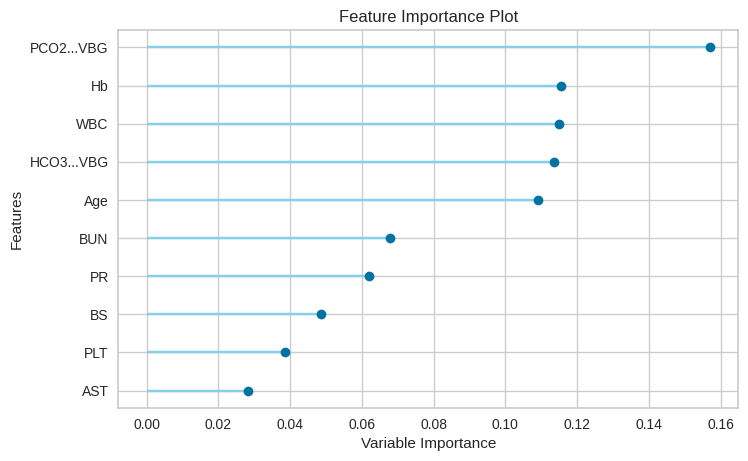

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(huber, plot = 'feature')

## **Ensembling**

In [20]:
# knn = create_model('knn')
# rf = create_model('rf')
# et = create_model('et')

In [21]:
# blend = blend_models([knn,rf,et])

## **evaluate models**

In [22]:
evaluate_model(huber)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
evaluate_model(huber)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
evaluate_model(huber)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#** Regression in this data**

In [ ]:
# !pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


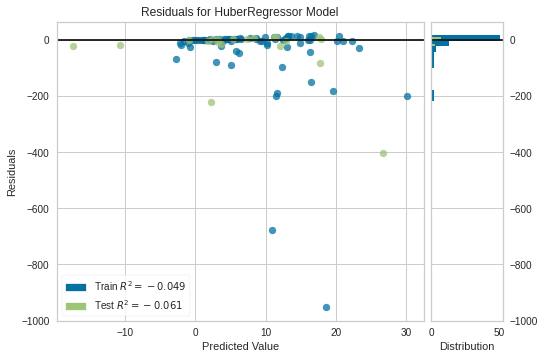

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(huber)